In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('cars.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
data.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [9]:
mgpby_year = data.groupby('model_year')['mpg'].mean()

In [10]:
mgpby_year

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

<AxesSubplot:xlabel='model_year'>

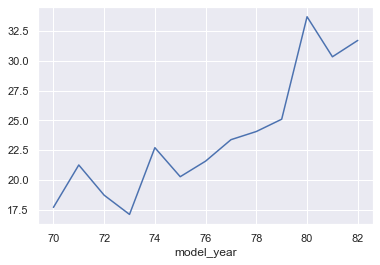

In [11]:
mgpby_year.plot()

In [17]:
mpg_year_origin = data.groupby(['model_year','origin'])['mpg'].mean().unstack()

<AxesSubplot:xlabel='model_year'>

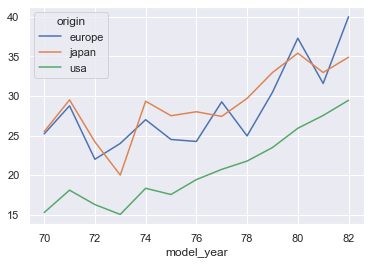

In [18]:
mpg_year_origin.plot()

In [20]:
data.groupby(['model_year','origin'])['mpg'].agg(['mean','max','min'])

mean   max   min
model_year origin                       
70         europe  25.200000  26.0  24.0
           japan   25.500000  27.0  24.0
           usa     15.272727  22.0   9.0
71         europe  28.750000  30.0  27.0
           japan   29.500000  35.0  25.0
           usa     18.100000  28.0  12.0
72         europe  22.000000  26.0  18.0
           japan   24.200000  28.0  19.0
           usa     16.277778  28.0  11.0
73         europe  24.000000  29.0  19.0
           japan   20.000000  22.0  18.0
           usa     15.034483  23.0  11.0
74         europe  27.000000  31.0  24.0
           japan   29.333333  32.0  24.0
           usa     18.333333  28.0  13.0
75         europe  24.500000  29.0  22.0
           japan   27.500000  33.0  24.0
           usa     17.550000  23.0  13.0
76         europe  24.250000  29.5  16.5
           japan   28.000000  33.0  19.0
           usa     19.431818  29.0  13.0
77         europe  29.250000  36.0  21.5
           japan   27.416667  33.5  21.5
           usa     20.722222  33.5  15.0
78         europe  24.950000  43.1  16.2
           japan   29.687500  39.4  21.1
           usa     21.772727  36.1  17.5
79         europe  30.450000  37.3  25.4
           japan   32.950000  34.1  31.8
           usa     23.478261  35.7  15.5
80         europe  37.288889  44.3  29.8
           japan   35.400000  46.6  23.7
           usa     25.914286  32.1  19.1
81         europe  31.575000  34.5  28.1
           japan   32.958333  39.1  24.2
           usa     27.530769  39.0  17.6
82         europe  40.000000  44.0  36.0
           japan   34.888889  38.0  31.0
           usa     29.450000  38.0  22.0

In [21]:
def get_most_efficient(group):
    return group.nlargest(n=2,columns='mpg').loc[:,["name","mpg"]]

In [22]:
most_eff = data.groupby(['model_year','origin']).apply(get_most_efficient)

In [23]:
most_eff

name   mpg
model_year origin                                             
70         europe 19                vw 1131 deluxe sedan  26.0
                  23                            bmw 2002  26.0
           japan  18                        datsun pl510  27.0
                  14               toyota corona mark ii  24.0
           usa    15                     plymouth duster  22.0
...                                                  ...   ...
82         europe 375                        vw rabbit l  36.0
           japan  383                        honda civic  38.0
                  385                      datsun 310 gx  38.0
           usa    378             plymouth horizon miser  38.0
                  387  oldsmobile cutlass ciera (diesel)  38.0

[78 rows x 2 columns]

In [25]:
data['mpg_group'] = data.groupby(['model_year','origin']).mpg.transform('mean')

In [28]:
data['mpg_outliers']  = (data.mpg - data.mpg_group).round(2)

In [29]:
data['mpg_outliers'].describe()

count    398.000000
mean       0.000729
std        4.555381
min      -11.700000
25%       -3.220000
50%       -0.885000
75%        2.730000
max       18.150000
Name: mpg_outliers, dtype: float64

In [30]:
data.loc[data['mpg_outliers'].abs()>10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_group,mpg_outliers
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.277778,11.72
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.722222,12.78
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.950000,18.15
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.772727,14.33
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.478261,12.22
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.478261,10.72
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.478261,11.02
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.478261,10.02
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.400000,11.20
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.400000,-11.70


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

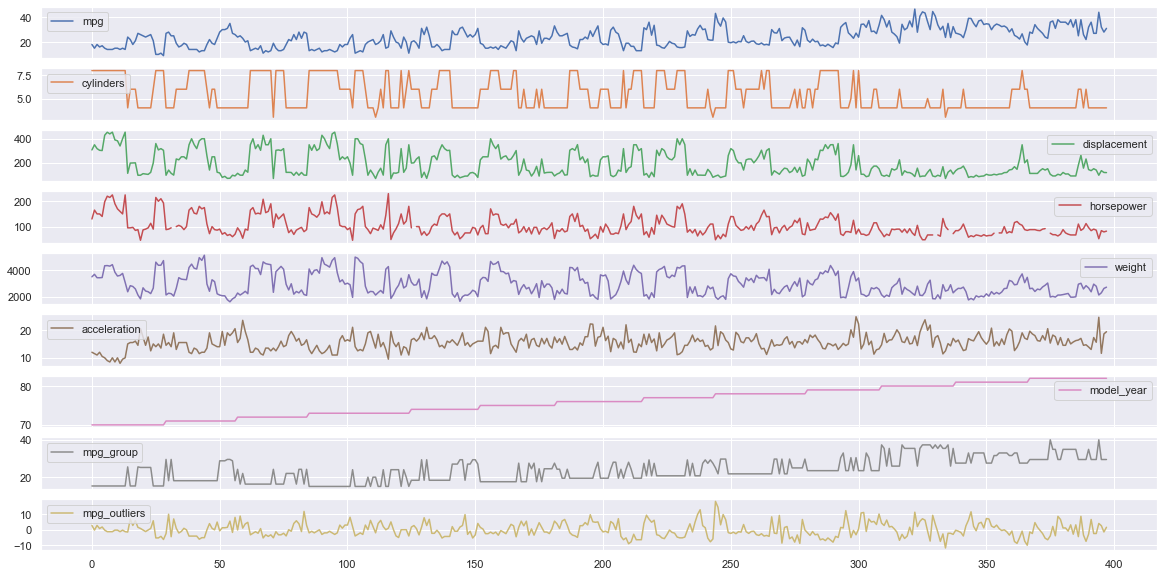

In [34]:

data.plot(subplots=True,figsize=(20,10))